<a href="https://colab.research.google.com/github/Dondada101/AI-Coursework--2025/blob/main/lab_practice5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os

path = kagglehub.dataset_download("saurograndi/airplane-crashes-since-1908")

print(f"Path to data set file {path}")



100%|██████████| 564k/564k [00:00<00:00, 62.8MB/s]

Extracting files...
Path to data set file /root/.cache/kagglehub/datasets/saurograndi/airplane-crashes-since-1908/versions/4


In [2]:
import os
import pandas as pd
import numpy as nm

data_dir="/root/.cache/kagglehub/datasets/saurograndi/airplane-crashes-since-1908/versions/4"
print(os.listdir(data_dir))
file_path=os.path.join(data_dir, 'Airplane_Crashes_and_Fatalities_Since_1908.csv')
df=pd.read_csv(file_path)

print(df)
print(df.shape[0])
print(df.shape[1])
#print(df.isnull())
#print(df.info())
#print(df.tail(75))

['Airplane_Crashes_and_Fatalities_Since_1908.csv']
            Date   Time                                           Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

            

In [10]:
fatality_locations=df[['Date','Location','Aboard','Fatalities']].copy()
print(fatality_locations)
max_fatality_row = fatality_locations.loc[fatality_locations['Fatalities'].idxmax()]
print(max_fatality_row)

fatality_locations['Survivors'] = fatality_locations['Aboard'] - fatality_locations['Fatalities']
print(fatality_locations['Survivors'])
no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]
print(no_fatalities)
ttl_no_fatalities = len(no_fatalities)
print(ttl_no_fatalities)

fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations['Region'] = fatality_locations['Region'].str.strip()
fatality_locations['Region'] = fatality_locations['State/Country'].str.strip()
print(fatality_locations[['Location', 'Region', 'State/Country']].head())
sorted_floc=fatality_locations.sort_values(by='Fatalities', ascending=False)
print(sorted_floc.head(100))


            Date                                           Location  Aboard  \
0     09/17/1908                                Fort Myer, Virginia     2.0   
1     07/12/1912                            AtlantiCity, New Jersey     5.0   
2     08/06/1913                 Victoria, British Columbia, Canada     1.0   
3     09/09/1913                                 Over the North Sea    20.0   
4     10/17/1913                         Near Johannisthal, Germany    30.0   
...          ...                                                ...     ...   
5263  05/20/2009                             Near Madiun, Indonesia   112.0   
5264  05/26/2009                  Near Isiro, DemocratiRepubliCongo     4.0   
5265  06/01/2009  AtlantiOcean, 570 miles northeast of Natal, Br...   228.0   
5266  06/07/2009       Near Port Hope Simpson, Newfoundland, Canada     1.0   
5267  06/08/2009                  State of Arunachal Pradesh, India    13.0   

      Fatalities  
0            1.0  
1            

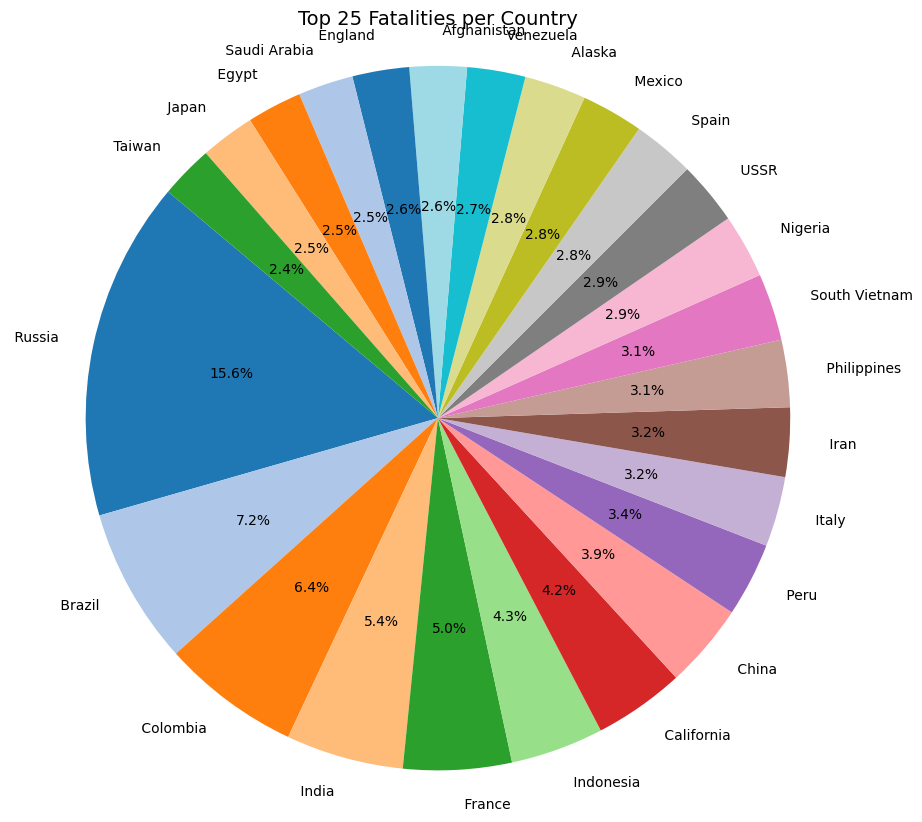

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


fatalities_by_location = fatality_locations.groupby('State/Country')['Fatalities'].sum().reset_index()

# 2. Sort descending and select top 25
top_25 = fatalities_by_location.sort_values(by='Fatalities', ascending=False).head(25)

# 3. Plot as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    top_25['Fatalities'],
    labels=top_25['State/Country'],
    autopct='%1.1f%%',       # Show percentages
    startangle=140,          # Rotate the start angle for better visibility
    colors=sns.color_palette('tab20', 25)  # Use a nice Seaborn color palette
)

plt.title('Top 25 Fatalities per Country', fontsize=14)
plt.axis('equal')  # Makes the pie chart a circle
plt.show()